In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from data_readers import (
    japanese_vowels,
    water_quality,
    ionosphere,
    heart_attack,
    banana_quality,
    climate,
    diabetes,
    biodegradable,
    plates
)

from classes import (
    ADAMLogisticRegression,
    IWLSLogisticRegression,
    SGDLogisticRegression,
)

In [5]:
def plot_convergence(ax, logistic_regression_model, title):
    ax.plot(range(1, len(logistic_regression_model.log_likelihoods) + 1), logistic_regression_model.log_likelihoods)
    ax.set_title(title)
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Log Likelihood')

Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


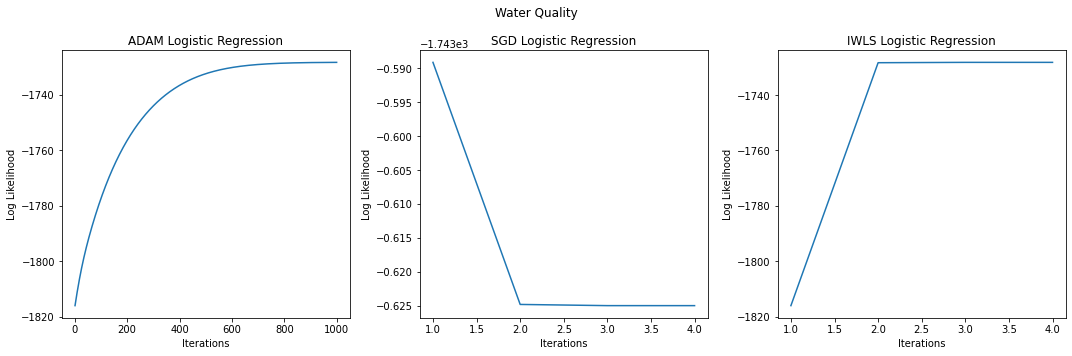

Optimization converged after 11 iterations.


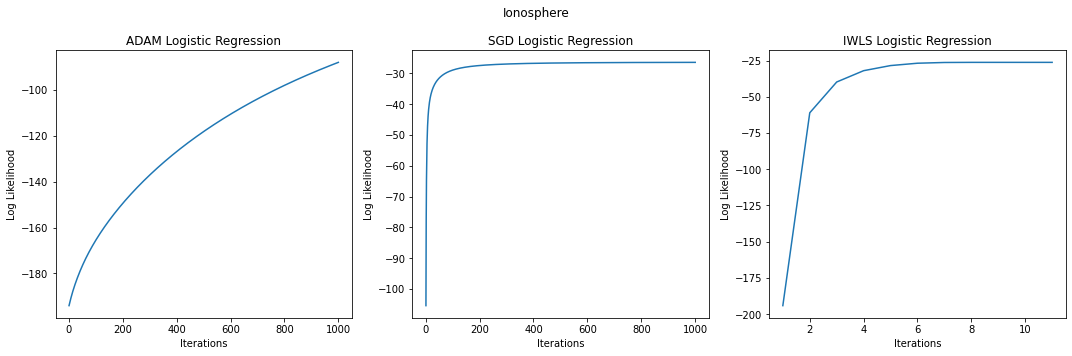

Optimization converged after 73 iterations.
Optimization converged after 7 iterations.


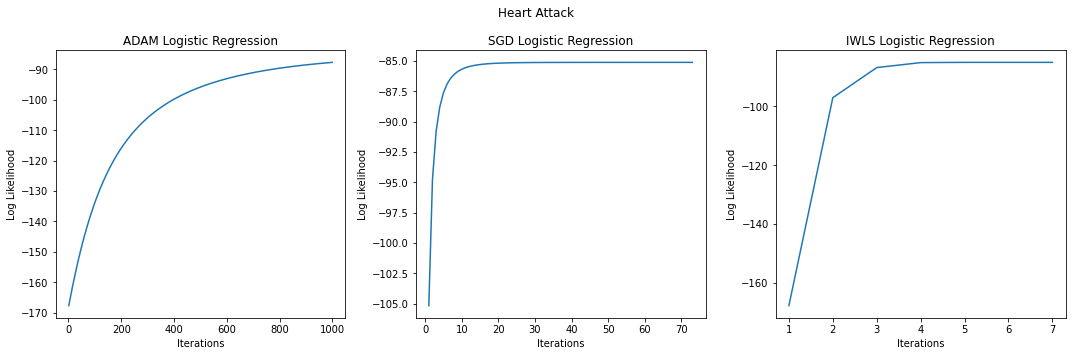

Optimization converged after 72 iterations.
Optimization converged after 10 iterations.


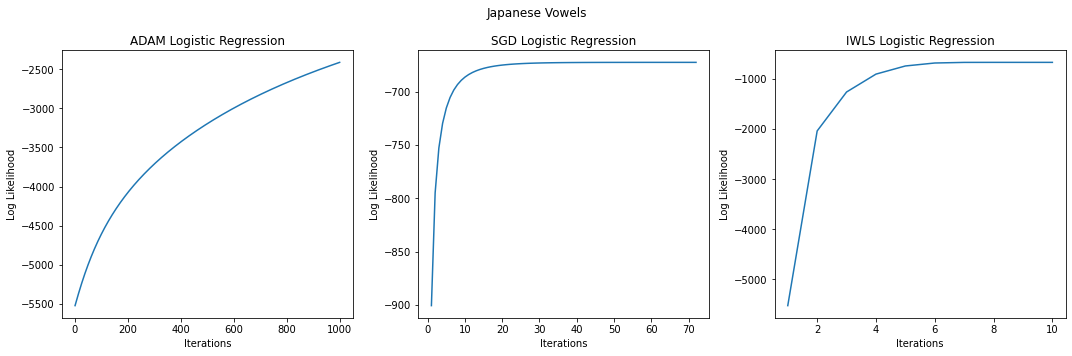

Optimization converged after 11 iterations.
Optimization converged after 8 iterations.


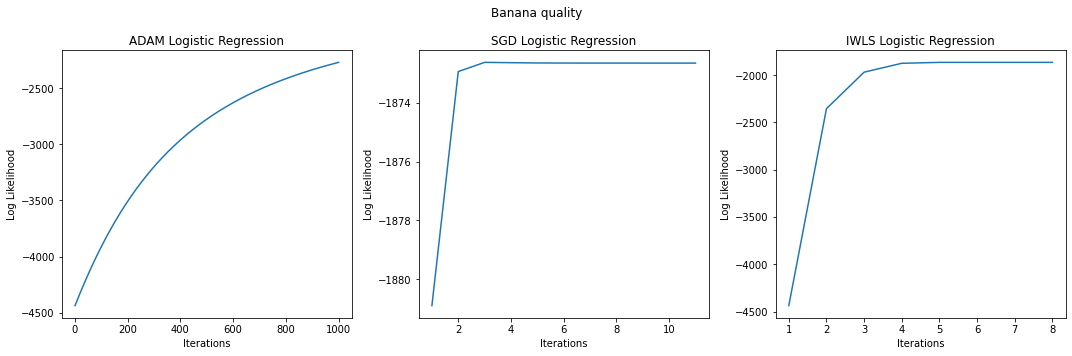

Optimization converged after 264 iterations.
Optimization converged after 9 iterations.


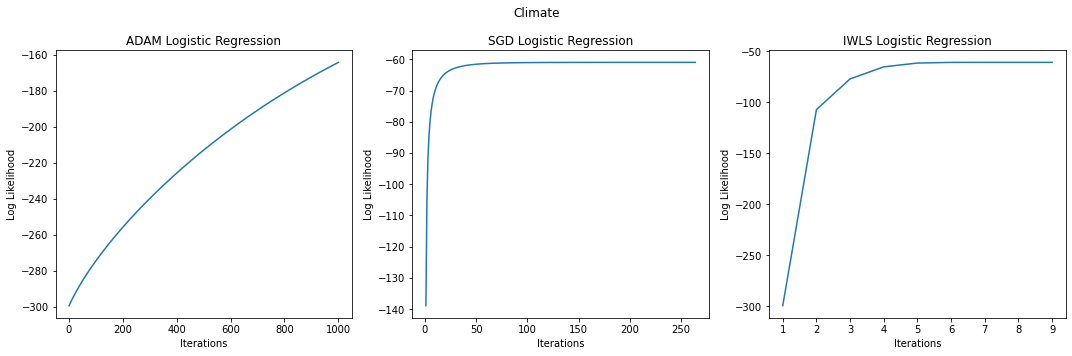

Optimization converged after 26 iterations.
Optimization converged after 6 iterations.


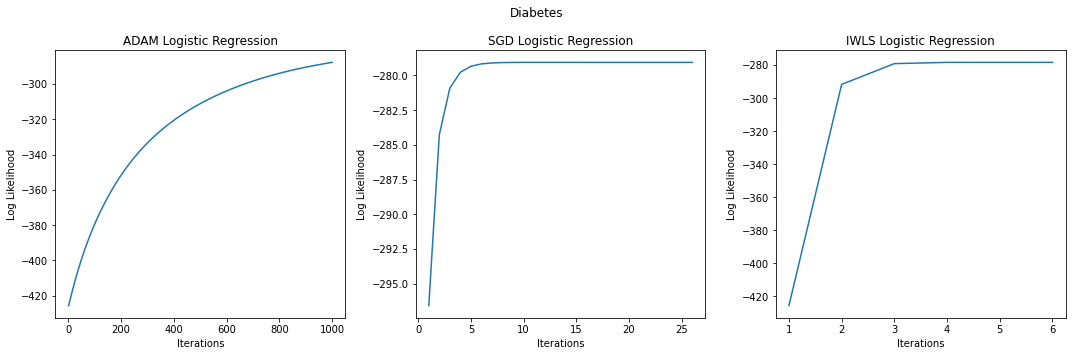

Optimization converged after 741 iterations.
Optimization converged after 17 iterations.


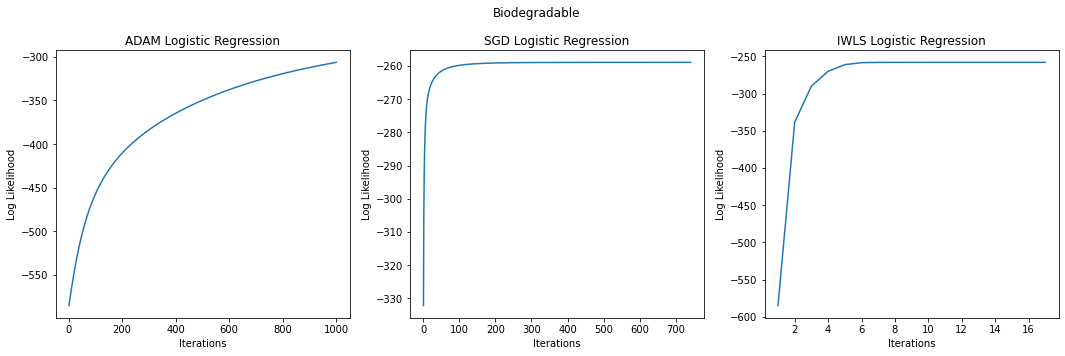

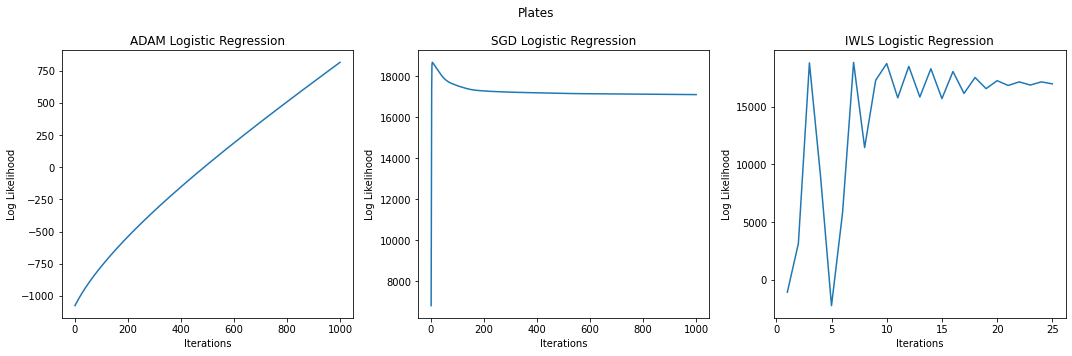

In [8]:
models = {
    "ADAM Logistic Regression": ADAMLogisticRegression(
        learning_rate=0.001, iterations=1000, beta1=0.9,
        beta2=0.999, epsilon=1e-8, include_interactions=False
    ),

    "SGD Logistic Regression": SGDLogisticRegression(
        learning_rate=0.01, iterations=1000, include_interactions=False
    ),

    "IWLS Logistic Regression": IWLSLogisticRegression(
        iterations=25, include_interactions=False
    )
}

datasets = {
    "Water Quality": water_quality(),
    "Ionosphere": ionosphere(),
    "Heart Attack": heart_attack(),
    "Japanese Vowels": japanese_vowels(),
    "Banana quality": banana_quality(),
    "Climate": climate(),
    "Diabetes": diabetes(),
    "Biodegradable": biodegradable(),
    "Plates": plates()
}

for dataset_name, data in datasets.items():
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(dataset_name)

    X, y = data

    scaler = StandardScaler()

    X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for ax, (name, model) in zip(axs, models.items()):
        model.fit(X_train_scaled,y_train)
        plot_convergence(ax, model, name)

    plt.tight_layout()
    plt.show()